# Solution : Prédiction prix de vente de voitures

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# Sélection des colonnes numériques et continues - à partir de la documentation

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width',
                          'height', 'curb-weight', 'bore', 'stroke', 'compression-rate',
                          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols]

numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Nettoyage de données

In [3]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
# Remplacer les valeurs manquantes dans d'autres colonnes en utilisant la moyenne.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [7]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
# Normaliser toutes les colonnes de sorte que les valeurs soient comprises entre 0 et 1 sauf pour la colonne cible.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Modèle univarié

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(0)
    
    # Randomiser l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié en set de training.
    # Sélectionner la seconde moitié en set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    # Ajuster un modèle KNN utilisant la valeur par défaut k.
    knn.fit(train_df[[train_col]], train_df[target_col])

    # faire des prédictions en utilisant ce modèle.
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculer et retourner la valeur RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

In [118]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# Pour chaque colonne (excepté 'price'), entrainer un modèle et retourner la valeur RMSE.
# et ajouter cette valeur au dictionnaire 'rmse_results'.

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Créer un objet Series depuis le dictionnaire
# ainsi nous pouvons facilement voir les résultats, les trier, etc…
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

highway-mpg          3777.523713
curb-weight          3787.561330
width                4271.073665
city-mpg             4976.546143
horsepower           5034.147732
length               5302.210564
compression-rate     5879.176607
wheel-base           6253.421020
bore                 6317.527642
stroke               6994.428896
height               7427.871557
peak-rpm             7675.208704
normalized-losses    7694.133287
dtype: float64

In [119]:
def knn_train_test2(train_col, target_col, df):
    np.random.seed(0)
    
    # Randomiser l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)

    # Sélectionner la première moitié en set de training.
    # Sélectionner la seconde moitié en set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster un modèle KNN utilisant la valeur de k en paramètre.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # faire des prédictions en utilisant ce modèle.
        predicted_labels = knn.predict(test_df[[train_col]])
        
        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [120]:
feature_k_rmse_results = {}

# Pour chaque colonne (excepté 'price'), entrainer un modèle et retourner la valeur RMSE.
# et ajouter cette valeur au dictionnaire 'rmse_results'.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test2(col, 'price', numeric_cars)
    feature_k_rmse_results[col] = rmse_val
    
feature_k_rmse_results

{'normalized-losses': {1: 7198.994532379346,
  3: 6529.8562048567055,
  5: 7694.133286555876,
  7: 7987.628783610602,
  9: 7761.689164903498},
 'wheel-base': {1: 6819.293013789684,
  3: 7362.586123635008,
  5: 6253.421019880333,
  7: 5573.225905481855,
  9: 5338.288351890573},
 'length': {1: 5017.542142176272,
  3: 4776.371518452917,
  5: 5302.210564182707,
  7: 5480.428810675179,
  9: 5307.678032131937},
 'width': {1: 5356.238846817645,
  3: 4125.028027907581,
  5: 4271.07366491016,
  7: 3967.5127797024734,
  9: 3876.4893087793434},
 'height': {1: 9857.10651015171,
  3: 8043.932461728211,
  5: 7427.871557002499,
  7: 7284.877904554024,
  9: 7322.240517721634},
 'curb-weight': {1: 5630.7166717589125,
  3: 4195.590106020102,
  5: 3787.561329791334,
  7: 3882.180025612269,
  9: 4064.820725294808},
 'bore': {1: 6779.311196355401,
  3: 6236.77329834246,
  5: 6317.527642022848,
  7: 6568.581649030158,
  9: 6353.511643243538},
 'stroke': {1: 7669.993588234892,
  3: 6757.958320141201,
  5: 69

normalized-losses
average_rmse: 7434.460394461205
wheel-base
average_rmse: 6269.36288293549
length
average_rmse: 5176.846213523803
width
average_rmse: 4319.268525623441
height
average_rmse: 7987.2057902316155
curb-weight
average_rmse: 4312.173771695486
bore
average_rmse: 6451.141085798881
stroke
average_rmse: 7120.347365852856
compression-rate
average_rmse: 6517.037509990086
horsepower
average_rmse: 4801.711554044539
peak-rpm
average_rmse: 7596.290518241517
city-mpg
average_rmse: 4781.124792266668
highway-mpg
average_rmse: 3995.4502381815464


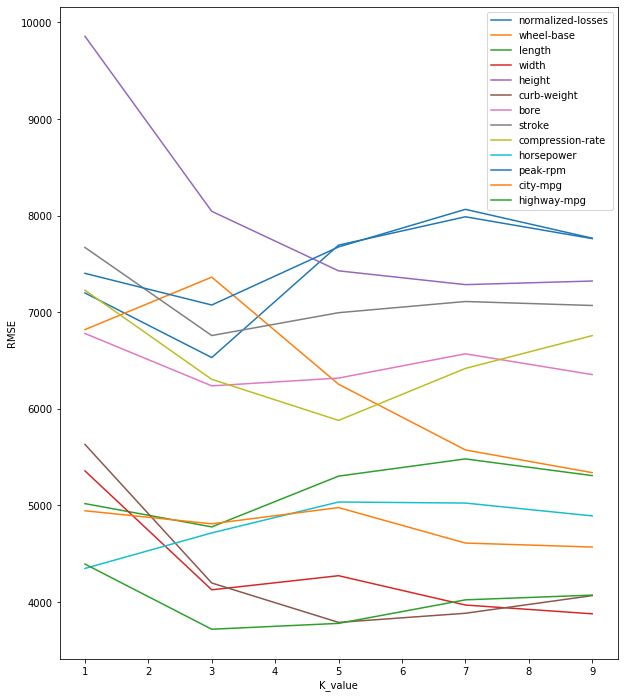

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

In [122]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['highway-mpg',
 'curb-weight',
 'width',
 'city-mpg',
 'horsepower',
 'length',
 'wheel-base',
 'bore',
 'compression-rate',
 'stroke',
 'normalized-losses',
 'peak-rpm',
 'height']

## Modèle multivarié

In [123]:
def knn_train_test3(train_cols, target_col, df):
    np.random.seed(0)
    
    # Randomise l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié pour le set de training.
    # Sélectionner la seconde moitié pour le set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster le modèle en utilisant la valeur k.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Faire des prédictions en utilisant le modèle.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [124]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]
best_six_features = sorted_features_list[0:6]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', numeric_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', numeric_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', numeric_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', numeric_cars)
k_rmse_features["best_six_rmse"] = knn_train_test3(best_six_features, 'price', numeric_cars)

k_rmse_features

{'best_two_rmse': {5: 4396.829486737636},
 'best_three_rmse': {5: 3475.3048246958792},
 'best_four_rmse': {5: 3511.3593557408094},
 'best_five_rmse': {5: 3486.5563456917153},
 'best_six_rmse': {5: 3587.0049585515308}}

## Variation des hyper paramètres

In [125]:
def knn_train_test4(train_cols, target_col, df):
    np.random.seed(0)
    
    # Randomise l'ordre des lignes du DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Diviser le nombre de lignes de moitié.
    last_train_row = int(len(rand_df) / 2)
    
    # Sélectionner la première moitié pour le set de training.
    # Sélectionner la seconde moitié pour le set de test.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Ajuster le modèle en utilisant la valeur k.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Faire des prédictions en utilisant le modèle.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculer et retourner la valeur RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [126]:
features = [best_three_features, best_four_features, best_five_features]
k_rmse_results = {}
k_rmse_results["best_three_features"] = knn_train_test4(best_three_features, 'price', numeric_cars)
k_rmse_results["best_four_features"] = knn_train_test4(best_four_features, 'price', numeric_cars)
k_rmse_results["best_five_features"] = knn_train_test4(best_five_features, 'price', numeric_cars)

k_rmse_results

{'best_three_features': {1: 4391.155204465332,
  2: 4003.193938643997,
  3: 3694.187855536207,
  4: 3354.341947073381,
  5: 3475.3048246958792,
  6: 3598.949475473044,
  7: 3537.3016311966785,
  8: 3676.2607905820946,
  9: 3745.6843826513646,
  10: 3883.541414663418,
  11: 4078.902846675315,
  12: 4152.404999463017,
  13: 4213.1146777729755,
  14: 4169.671157535355,
  15: 4221.441556543633,
  16: 4213.672852924302,
  17: 4218.356845186168,
  18: 4192.820287007677,
  19: 4217.643261272345,
  20: 4295.377648630727,
  21: 4340.998984318577,
  22: 4376.278394074132,
  23: 4398.208802661311,
  24: 4392.677964811508},
 'best_four_features': {1: 3313.0066584315646,
  2: 3266.1566409115003,
  3: 3328.7609866541375,
  4: 3379.155310612783,
  5: 3511.3593557408094,
  6: 3602.800208811121,
  7: 3596.3062908438637,
  8: 3828.429896627479,
  9: 3883.525944740984,
  10: 3963.0579204437677,
  11: 4016.223415732718,
  12: 4062.353937909083,
  13: 4089.963376328478,
  14: 4130.664116157744,
  15: 4095.

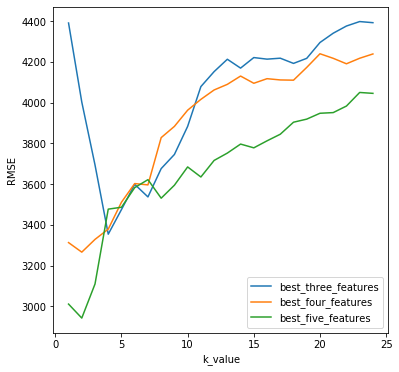

In [127]:
plt.figure(figsize=(6, 6))

for key, value in k_rmse_results.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()